In [1]:
import pandas as pd
import numpy as np
data_frame = pd.read_csv("Glassdoor_jobs_1.csv")

In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Job Title                       5578 non-null   object 
 1   Salary Estimate                 5578 non-null   object 
 2   Job Description                 5578 non-null   object 
 3   Rating                          5578 non-null   float64
 4   Company Name                    5578 non-null   object 
 5   Location                        5578 non-null   object 
 6   Size                            5578 non-null   object 
 7   Founded                         5578 non-null   int64  
 8   Type of ownership               5578 non-null   object 
 9   Industry                        5578 non-null   object 
 10  Sector                          5578 non-null   object 
 11  Revenue                         5578 non-null   object 
 12  City                            55

In [3]:
data_frame.head(50)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Local Purchasing Power Index
0,Geospatial Researcher/Data Scientist IV,$76K - $120K (Glassdoor est.),Battelle delivers when others can’t. We conduc...,3.6,Battelle,"Fort Belvoir, VA",1001 to 5000 Employees,1929,Nonprofit Organization,Research & Development,Management & Consulting,$5 to $10 billion (USD),"Arlington, VA",84.5,69.4,77.32,125.11
1,Senior Data Scientist,$101K - $138K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,"Arlington, VA",84.5,69.4,77.32,125.11
2,Software Integrator / Data Scientist - Expert ...,$74K - $109K (Glassdoor est.),*** Must have TS/SCI ***\nJOB DESCRIPTION:\nIn...,4.6,Que Technology Group,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,-1,Less than $1 million (USD),"Arlington, VA",84.5,69.4,77.32,125.11
3,Lead Data Scientist,$116K - $161K (Glassdoor est.),Tensure is a fully-remote technology consultin...,3.8,Tensure Consulting,"Washington, DC",1 to 50 Employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,"Arlington, VA",84.5,69.4,77.32,125.11
4,Data Scientist,$76K - $108K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,"Arlington, VA",84.5,69.4,77.32,125.11
5,Data Scientist,Employer Provided Salary:$65K - $205K,Data Scientist\nCome join the winning team on ...,4.3,GS Consulting,"Fort George G Meade, MD",1 to 50 Employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,"Arlington, VA",84.5,69.4,77.32,125.11
6,Defense Data Scientist II,$87K - $126K (Glassdoor est.),Overview\n\nGuidehouse is a leading global pro...,3.7,Guidehouse,"McLean, VA",1001 to 5000 Employees,2018,Company - Private,Business Consulting,Management & Consulting,Unknown / Non-Applicable,"Arlington, VA",84.5,69.4,77.32,125.11
7,Senior Data Analyst,Employer Provided Salary:$100K - $125K,This position requires 3 days per week onsite ...,3.8,Bloomberg Industry Group,"Washington, DC",1001 to 5000 Employees,1929,Company - Private,Publishing,Media & Communication,$100 to $500 million (USD),"Arlington, VA",84.5,69.4,77.32,125.11
8,Data Scientist,Employer Provided Salary:$125K - $185K,Introduction:\nEpochGeo is looking for a Mid o...,-1.0,EpochGeo,"Washington, DC",-1,-1,-1,-1,-1,-1,"Arlington, VA",84.5,69.4,77.32,125.11
9,Defense Senior Data Scientist I,$96K - $137K (Glassdoor est.),Overview\n\nGuidehouse is a leading global pro...,3.7,Guidehouse,"McLean, VA",1001 to 5000 Employees,2018,Company - Private,Business Consulting,Management & Consulting,Unknown / Non-Applicable,"Arlington, VA",84.5,69.4,77.32,125.11


In [4]:
#drop duplicate job postings 
data_frame.drop_duplicates(inplace = True)
data_frame.shape

(3488, 17)

Number of rows got reduced from 5578 to 3488 after removing the duplictaes

In [5]:
# to check if there are any null values in Salary column
data_frame['Salary Estimate'].isna().sum()

0

In [6]:
# checking for types of values Salary Estimate column holds
data_frame['Salary Estimate'].value_counts()

$135K - $175K (Employer est.)           156
-1                                      139
$65K - $205K (Employer est.)            111
$180K - $260K (Employer est.)            86
$210K - $304K (Employer est.)            76
                                       ... 
Employer Provided Salary:$125K            1
$58K - $80K (Glassdoor est.)              1
Employer Provided Salary:$52K - $55K      1
$81K - $126K (Glassdoor est.)             1
$112K - $157K (Glassdoor est.)            1
Name: Salary Estimate, Length: 810, dtype: int64

In [7]:
# deleting 139 rows with no salary information (-1 values). This is around 4% of the total number of rows
data_frame = data_frame[data_frame['Salary Estimate'] != '-1']
data_frame.shape

(3349, 17)

Number of rows got reduced from 3488 to 3349 after removing the rows with no salary information

In [8]:
data_frame['Salary Estimate'].value_counts()

$135K - $175K (Employer est.)           156
$65K - $205K (Employer est.)            111
$180K - $260K (Employer est.)            86
$210K - $304K (Employer est.)            76
$120K - $140K (Employer est.)            75
                                       ... 
Employer Provided Salary:$125K            1
$58K - $80K (Glassdoor est.)              1
Employer Provided Salary:$52K - $55K      1
$81K - $126K (Glassdoor est.)             1
$112K - $157K (Glassdoor est.)            1
Name: Salary Estimate, Length: 809, dtype: int64

In [9]:
# Creating separate columns for following types of salary 
# 1. Per Hour
# 2. Employer Provided Salary
# 3. Employer est.
data_frame['hourly'] = data_frame['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
data_frame['employer provided'] = data_frame['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)
data_frame['employer estimate'] = data_frame['Salary Estimate'].apply(lambda x: 1 if 'employer est.' in x.lower() else 0)

In [10]:
# to check if there are values in the new columns
data_frame.loc[data_frame['hourly']==1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Local Purchasing Power Index,hourly,employer provided,employer estimate
23,Senior Data Scientist,Employer Provided Salary:$70 - $75 Per Hour,Experienced in data science / machine learning...,-1.0,Enormous Enterprise LLC,"McLean, VA",51 to 200 Employees,2016,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,"Arlington, VA",84.50,69.40,77.32,125.11,1,1,0
121,Data Scientist,Employer Provided Salary:$75 - $80 Per Hour,Overview:\nA data scientist requires large amo...,4.0,Professional Alternative,"Atlanta, GA",Unknown,1995,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,"Atlanta, GA",73.89,49.18,62.14,123.55,1,1,0
216,Data Scientist/Big Data Analyst,Employer Provided Salary:$50 - $60 Per Hour,Data Scientist / Big Data Specialist\nLocation...,4.7,PRISMITCORP,"Austin, TX",1 to 50 Employees,-1,Company - Private,Information Technology Support Services,Information Technology,Less than $1 million (USD),"Austin, TX",69.28,62.85,66.22,147.45,1,1,0
226,Data Scientist,Employer Provided Salary:$65 - $70 Per Hour,"Hi,\nGreetings...!\nTitle: Data Scientist\nDur...",3.5,NexWave Talent Management Solutions Pvt Ltd.,"Austin, TX",Unknown,-1,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,"Austin, TX",69.28,62.85,66.22,147.45,1,1,0
306,Sr. Research Data Analyst,Employer Provided Salary:$28 - $38 Per Hour,We are seeking a Sr. Research Data Analyst who...,4.1,Johns Hopkins University,"Baltimore, MD",10000+ Employees,1876,College / University,Colleges & Universities,Education,$1 to $5 billion (USD),"Baltimore, MD",73.65,49.23,62.03,122.35,1,1,0
1020,Data Scientist,Employer Provided Salary:$45 - $65 Per Hour,Data Scientist Contractor\nKaizen Analytix LLC...,-1.0,Kaizen Analytix,"Dallas, TX",-1,-1,-1,-1,-1,-1,"Dallas, TX",74.70,53.55,64.64,132.63,1,1,0
1112,"Analytics Developer, Data Science",Employer Provided Salary:$35 - $52 Per Hour,"Analytics Developer, Data Science\nThis is a f...",3.9,UCHealth,"Aurora, CO",10000+ Employees,2006,Hospital,Health Care Services & Hospitals,Healthcare,Unknown / Non-Applicable,"Denver, CO",80.61,54.44,68.16,130.62,1,1,0
1128,Athletics Gameday Statistician,Employer Provided Salary:$25 Per Hour,Job no: 494161\nWork type: Staff Part-Time\nLo...,3.9,The University Of Denver,"Denver, CO",1001 to 5000 Employees,1864,College / University,Colleges & Universities,Education,$100 to $500 million (USD),"Denver, CO",80.61,54.44,68.16,130.62,1,1,0
1203,Artificial Intelligence Documentation Specialist,Employer Provided Salary:$20 - $23 Per Hour,Could Conversely AI be your next move? Your fu...,-1.0,Conversely AI,"Bloomfield Hills, MI",-1,-1,-1,-1,-1,-1,"Detroit, MI",71.60,38.46,55.84,110.57,1,1,0
1204,Data Scientist(Data Bricks experience)-Hybrid,Employer Provided Salary:$35 - $46 Per Hour,"Job Title: Data Scientist\nLocation: Detroit, ...",-1.0,IPS Technology Services,"Detroit, MI",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,"Detroit, MI",71.60,38.46,55.84,110.57,1,1,0


We observed all the rows with string 'per hour' also contain string 'employer provided salary'.

In [11]:
# Removing text after bracket from salary column
salary = data_frame['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [12]:
salary.head(40)

0                                   $76K - $120K 
1                                  $101K - $138K 
2                                   $74K - $109K 
3                                  $116K - $161K 
4                                   $76K - $108K 
5           Employer Provided Salary:$65K - $205K
6                                   $87K - $126K 
7          Employer Provided Salary:$100K - $125K
8          Employer Provided Salary:$125K - $185K
9                                   $96K - $137K 
10         Employer Provided Salary:$160K - $200K
11         Employer Provided Salary:$110K - $115K
12                 Employer Provided Salary:$215K
13          Employer Provided Salary:$50K - $300K
14                                   $46K - $73K 
15         Employer Provided Salary:$120K - $130K
16                                  $83K - $125K 
17          Employer Provided Salary:$62K - $117K
18          Employer Provided Salary:$96K - $237K
19                                  $91K - $131K 


In [13]:
# Removing K and $ from the salary column
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))
minus_Kd.head(50)

0                                     76 - 120 
1                                    101 - 138 
2                                     74 - 109 
3                                    116 - 161 
4                                     76 - 108 
5             Employer Provided Salary:65 - 205
6                                     87 - 126 
7            Employer Provided Salary:100 - 125
8            Employer Provided Salary:125 - 185
9                                     96 - 137 
10           Employer Provided Salary:160 - 200
11           Employer Provided Salary:110 - 115
12                 Employer Provided Salary:215
13            Employer Provided Salary:50 - 300
14                                     46 - 73 
15           Employer Provided Salary:120 - 130
16                                    83 - 125 
17            Employer Provided Salary:62 - 117
18            Employer Provided Salary:96 - 237
19                                    91 - 131 
20                                     4

In [14]:
# to check how many rows still contains any alphabet values 
minus_Kd.str.contains('[a-zA-Z]').sum()

309

In [15]:
# Number of rows with word 'Employer'
minus_Kd.str.contains('Employer').sum()

309

All the rows with text have word 'Employer' in them. Removing text from the employer rows would remove text from all the rows.

In [16]:
# replacing 'per hour' and 'employer provided salary' with blank 
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [17]:
# Creating min_and max salary columns
data_frame['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]) if '-' in x else np.NaN)
data_frame['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]) if '-' in x else np.NaN)

In [18]:
#Converting hourly wage to annual 
# Multiplying with 2 as 8hrs/day * 5 days/week * 50 weeks=2000
# A year has 52 weeks but 2 of those weeks are assigned to holidays and vacation time.

# As all the salaries are in thousands(000), multiplying only with 2 and not 2000.

data_frame['min_salary'] = data_frame.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
data_frame['max_salary'] = data_frame.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [19]:
# to check how do the below columns look like after the conversion
data_frame[data_frame.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
23,1,140.0,150.0
121,1,150.0,160.0
216,1,100.0,120.0
226,1,130.0,140.0
306,1,56.0,76.0
1020,1,90.0,130.0
1112,1,70.0,104.0
1128,1,NaN,NaN
1203,1,40.0,46.0
1204,1,70.0,92.0


In [20]:
# Calculating average salary
data_frame['avg_salary'] =(data_frame.min_salary+data_frame.max_salary)/2

In [21]:
#If salary is not provided in range format, assigned the single value salary available
data_frame['avg_salary'][data_frame['avg_salary'].isna()] = min_hr

C:\Users\WM796GU\AppData\Local\Temp\ipykernel_25116\2069483844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['avg_salary'][data_frame['avg_salary'].isna()] = min_hr


In [22]:
#Converting hourly wage to annual when salary is not provided in range. Considering this only provided value to be average
data_frame['avg_salary'][data_frame['min_salary'].isna() & data_frame.hourly ==1] = data_frame['avg_salary'].astype(float)*2

C:\Users\WM796GU\AppData\Local\Temp\ipykernel_25116\3314156743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['avg_salary'][data_frame['min_salary'].isna() & data_frame.hourly ==1] = data_frame['avg_salary'].astype(float)*2


In [23]:
data_frame[data_frame.hourly ==1][['hourly','min_salary','max_salary','avg_salary']]

,hourly,min_salary,max_salary,avg_salary
23,1,140.0,150.0,145.0
121,1,150.0,160.0,155.0
216,1,100.0,120.0,110.0
226,1,130.0,140.0,135.0
306,1,56.0,76.0,66.0
1020,1,90.0,130.0,110.0
1112,1,70.0,104.0,87.0
1128,1,NaN,NaN,50.0
1203,1,40.0,46.0,43.0
1204,1,70.0,92.0,81.0


# State of the job Location

In [25]:
#state of the job location
data_frame['job_state'] = data_frame['Location'].apply(lambda x: x.split(',')[1])

IndexError: list index out of range

In [26]:
# Figuring out reason for the error
# Filtererd the rows which don't have ','
data_frame['Location'][~data_frame['Location'].str.contains(',')].value_counts()

Manhattan        17
California       16
United States    12
Texas             3
Florida           3
St Louis Park     2
Hawaii            1
Pennsylvania      1
Name: Location, dtype: int64

Above locations do not have character ',' in them. This is leading to the above error in accessing the second item of the list.

In [27]:
# To check the cities for which above locations got scrapped
data_frame[~data_frame['Location'].str.contains(',')]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Local Purchasing Power Index,hourly,employer provided,employer estimate,min_salary,max_salary,avg_salary
292,Senior Health Statistician / Data Scientist,$135K - $175K (Employer est.),Aon is looking for a Senior Health Statisticia...,3.9,Aon,Texas,10000+ Employees,1892,Company - Public,Insurance Agencies & Brokerages,...,69.28,62.85,66.22,147.45,0,0,1,135.0,175.0,155.0
1061,Machine Learning Engineer,$60K - $124K (Employer est.),This is a remote hybrid position\nROSEN is a l...,3.8,Rosen,Texas,1001 to 5000 Employees,1982,Company - Private,General Repair & Maintenance,...,74.70,53.55,64.64,132.63,0,0,1,60.0,124.0,92.0
1120,"Data Scientist IV, Utility Reliability - REMOTE",Employer Provided Salary:$120K - $160K,Are you an experienced data scientist looking ...,3.1,E Source,United States,201 to 500 Employees,1987,Company - Private,Energy & Utilities,...,80.61,54.44,68.16,130.62,0,1,0,120.0,160.0,140.0
1335,Ecommerce Data Scientist - REMOTE,$120K - $140K (Employer est.),The Ecommerce Data Scientist will work directl...,-1.0,Stingray Direct,California,-1,-1,-1,-1,...,81.30,84.80,83.00,165.10,0,0,1,120.0,140.0,130.0
1374,Senior Machine Learning Engineer,$120K - $140K (Employer est.),About the team\nAre you interested in innovati...,3.9,Zillow,California,5001 to 10000 Employees,2005,Company - Public,Real Estate,...,81.30,84.80,83.00,165.10,0,0,1,120.0,140.0,130.0
1400,"Director, Data Science- SMB Labs",Employer Provided Salary:$214K - $310K,Your Job\nWe are seeking a Director of Data Sc...,4.4,Indeed,Hawaii,10000+ Employees,2004,Company - Private,Internet & Web Services,...,101.93,63.42,83.61,92.17,0,1,0,214.0,310.0,262.0
1406,DATA PROCESSING SYSTEMS ANALYST I (SR-20),Employer Provided Salary:$52K,"Salary\n$4,337.00 Monthly\nLocation\nOahu, HI\...",4.4,"City and County of Honolulu, HI",United States,5001 to 10000 Employees,-1,Government,Municipal Agencies,...,101.93,63.42,83.61,92.17,0,1,0,NaN,NaN,52
1410,RESEARCH STATISTICIAN III AND IV - OAHU,Employer Provided Salary:$51K - $62K,Recruitment Information\nRecruitment Number 21...,3.8,State of Hawaii,United States,201 to 500 Employees,1960,Government,State & Regional Agencies,...,101.93,63.42,83.61,92.17,0,1,0,51.0,62.0,56.5
1460,Senior Health Statistician / Data Scientist,Employer Provided Salary:$135K - $175K,Aon is looking for a Senior Health Statisticia...,3.9,Aon,Texas,10000+ Employees,1892,Company - Public,Insurance Agencies & Brokerages,...,66.85,46.03,56.95,157.92,0,1,0,135.0,175.0,155.0
1663,Senior Health Statistician / Data Scientist,Employer Provided Salary:$135K - $175K,Aon is looking for a Senior Health Statisticia...,3.9,Aon,California,10000+ Employees,1892,Company - Public,Insurance Agencies & Brokerages,...,76.38,72.32,74.45,137.44,0,1,0,135.0,175.0,155.0


In [28]:
# Assigning city names(cities for which these locations got scrapped) to these locations
data_frame['Location'][~data_frame['Location'].str.contains(',')]=data_frame['City']

C:\Users\WM796GU\AppData\Local\Temp\ipykernel_25116\1745207489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Location'][~data_frame['Location'].str.contains(',')]=data_frame['City']


In [29]:
# checking how many locations still don't have ','
data_frame['Location'][~data_frame['Location'].str.contains(',')].value_counts()

Series([], Name: Location, dtype: int64)

All the locations have ',' now.

In [30]:
data_frame.shape

(3349, 23)

In [31]:
# Extracted states from the locations without error this time
data_frame['job_state'] = data_frame['Location'].apply(lambda x: x.split(',')[1])

In [32]:
data_frame['job_state'].value_counts()

 CA          652
 TX          281
 FL          259
 OH          253
 NC          182
 NY          180
 VA          113
 MD          111
 MO          109
 MA           97
 AZ           90
 MI           86
 CO           84
 IL           82
 WA           82
 UT           80
 OR           80
 MN           79
 GA           76
 PA           64
 IN           59
 TN           55
 DC           52
 QC           36
 NV           34
 KS           24
 HI           20
 NJ           18
 DE            6
 Cuyahoga      3
 KY            1
 SC            1
Name: job_state, dtype: int64

In [33]:
# We noticed there are leading spaces in the above output. Removing those leading spaces
data_frame['job_state'] = data_frame['job_state'].apply(lambda x: x.lstrip(' '))

In [34]:
# We noticed there is a state 'QC' in the above output. Removing QC(Quebec), Canada jobs
data_frame = data_frame[data_frame['job_state']!='QC']

Number of rows got reduced from 3349 to 3313 after removing Canada jobs

In [35]:
data_frame['job_state'].value_counts()

CA          652
TX          281
FL          259
OH          253
NC          182
NY          180
VA          113
MD          111
MO          109
MA           97
AZ           90
MI           86
CO           84
WA           82
IL           82
OR           80
UT           80
MN           79
GA           76
PA           64
IN           59
TN           55
DC           52
NV           34
KS           24
HI           20
NJ           18
DE            6
Cuyahoga      3
KY            1
SC            1
Name: job_state, dtype: int64

In [36]:
# Mapping Cuyahoga which  with Ohio 2 letter abbreviation 
data_frame['job_state'][data_frame['job_state']=='Cuyahoga']='OH'

In [37]:
data_frame['job_state'].value_counts()

CA    652
TX    281
FL    259
OH    256
NC    182
NY    180
VA    113
MD    111
MO    109
MA     97
AZ     90
MI     86
CO     84
WA     82
IL     82
UT     80
OR     80
MN     79
GA     76
PA     64
IN     59
TN     55
DC     52
NV     34
KS     24
HI     20
NJ     18
DE      6
KY      1
SC      1
Name: job_state, dtype: int64

In [38]:
data_frame['job_state'].isnull().sum()

0

# Job Title

In [39]:
## Looking for types of job titles
data_frame['Job Title'].value_counts()

Data Scientist                                        515
Senior Data Scientist                                  97
Senior Data Analyst                                    61
Machine Learning Engineer                              43
Senior Associate, Data Analyst Learning Deployment     28
                                                     ... 
Dist. Tech - AI and Machine Learning Engineer           1
DATA SCIENCE CONSULTANT HOUSTON                         1
Forensic Data & Analytics Experienced Associate         1
Data Warehouse and AI Engineer                          1
Machine Learning Principal/Architect                    1
Name: Job Title, Length: 1333, dtype: int64

Although, my scrapper code searched only for 'data scientist' roles on Glassdoor, data got pulled for many other types of roles. Let's divide them in broad categories.

Also, there are many types of data scientist roles. Ex: Computer Vision Data Scientist. I am categorizing all those data scientist roles into 1 data scientist category.

In [40]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [41]:
data_frame['job_simp'] = data_frame['Job Title'].apply(title_simplifier)
data_frame['job_simp'].value_counts()

data scientist    1704
na                 578
analyst            505
mle                254
data engineer      120
manager            101
director            51
Name: job_simp, dtype: int64

For the 'NA' values, even if they are not true data scientist positions, they can still be used for the salary prediciton.

In [42]:
# defining seniority
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'entry level' in title.lower():
        return 'junior'
    else:
        return 'na'

In [43]:
data_frame['seniority'] = data_frame['Job Title'].apply(seniority)
data_frame.seniority.value_counts()

na        2113
senior    1140
junior      60
Name: seniority, dtype: int64

In [44]:
#  Job description length 
data_frame['desc_len'] = data_frame['Job Description'].apply(lambda x: len(x))
data_frame['desc_len']

0        984
1       1127
2        594
3        853
4       1325
        ... 
5343     709
5344     817
5351     884
5374     581
5427    2125
Name: desc_len, Length: 3313, dtype: int64

In [45]:
# checking if there are null values for job description
data_frame[data_frame['Job Description']==-1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,hourly,employer provided,employer estimate,min_salary,max_salary,avg_salary,job_state,job_simp,seniority,desc_len


In [46]:
##parsing of job description (python, etc.)
#python
data_frame['python_yn'] = data_frame['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data_frame.python_yn.value_counts()

0    3017
1     296
Name: python_yn, dtype: int64

In [47]:
#SQL
data_frame['sql_yn'] = data_frame['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data_frame.sql_yn.value_counts()

0    3118
1     195
Name: sql_yn, dtype: int64

# Handling Null values

### Numeric column #1 - Age of company

In [48]:
#age of company 
data_frame['age'] = data_frame.Founded.apply(lambda x: x if x <1 else 2022 - x)

In [49]:
# counting number of rows with missing values (Web scraping code replaces NA value with -1) for 'age' column
data_frame['age'].value_counts()

-1      592
 172    156
 24     102
 18      99
 28      94
       ... 
 226      1
 149      1
 123      1
 131      1
 189      1
Name: age, Length: 192, dtype: int64

<AxesSubplot:>

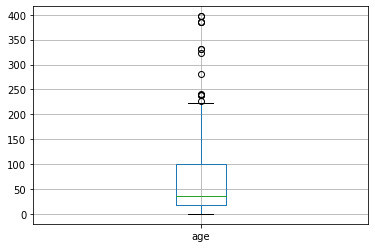

In [50]:
# To check which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.
data_frame[data_frame['age']!=-1].boxplot(column = ['age'])

The data is skewed. There are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.

Thus, one may want to use either median or mode.

In [51]:
# Calculating median
age_median = np.median(data_frame[data_frame['age']!=-1]['age'])

In [52]:
age_median

36.0

In [53]:
# filling rows with age=-1 (Web scraping code replaces NA value with -1) with median
#data_frame[data_frame['age']==-1]['age']=-2
data_frame.loc[data_frame['age']==-1, 'age'] = age_median

In [54]:
data_frame['age'].value_counts()

36     612
172    156
24     102
18      99
28      94
      ... 
226      1
149      1
123      1
131      1
189      1
Name: age, Length: 191, dtype: int64

In [55]:
data_frame.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,min_salary,max_salary,avg_salary,job_state,job_simp,seniority,desc_len,python_yn,sql_yn,age
0,Geospatial Researcher/Data Scientist IV,$76K - $120K (Glassdoor est.),Battelle delivers when others can’t. We conduc...,3.6,Battelle,"Fort Belvoir, VA",1001 to 5000 Employees,1929,Nonprofit Organization,Research & Development,...,76.0,120.0,98.0,VA,data scientist,na,984,0,0,93
1,Senior Data Scientist,$101K - $138K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,...,101.0,138.0,119.5,VA,data scientist,senior,1127,0,0,36
2,Software Integrator / Data Scientist - Expert ...,$74K - $109K (Glassdoor est.),*** Must have TS/SCI ***\nJOB DESCRIPTION:\nIn...,4.6,Que Technology Group,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,...,74.0,109.0,91.5,VA,data scientist,na,594,0,0,36
3,Lead Data Scientist,$116K - $161K (Glassdoor est.),Tensure is a fully-remote technology consultin...,3.8,Tensure Consulting,"Washington, DC",1 to 50 Employees,-1,Company - Private,-1,...,116.0,161.0,138.5,DC,data scientist,senior,853,1,1,36
4,Data Scientist,$76K - $108K (Glassdoor est.),"JDSAT, Inc. is a solutions company - utilizing...",4.3,JDSAT,"McLean, VA",1 to 50 Employees,-1,Company - Private,-1,...,76.0,108.0,92.0,VA,data scientist,na,1325,0,0,36


###  Numeric column #2 - Rating

In [56]:
# counting number of rows with missing values in 'rating' column 
data_frame['Rating'].value_counts()

 4.0    470
 3.9    402
 4.1    301
 4.2    280
 3.8    276
 3.7    234
 3.6    198
 4.4    167
-1.0    166
 4.3    155
 3.3     89
 3.5     88
 5.0     70
 4.8     69
 3.4     62
 4.5     50
 4.6     41
 4.7     38
 3.2     32
 3.1     26
 3.0     24
 4.9     20
 2.9     10
 2.8      8
 2.2      8
 1.0      6
 2.7      6
 2.3      4
 2.6      3
 2.5      2
 2.1      2
 2.0      2
 1.4      2
 2.4      1
 1.6      1
Name: Rating, dtype: int64

There are 158 rows with missing rating.

<AxesSubplot:>

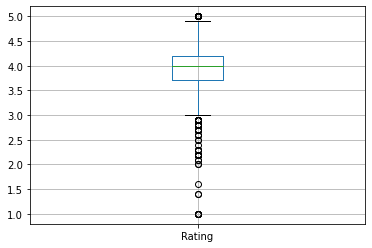

In [57]:
# To check which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.
data_frame[data_frame['Rating']!=-1].boxplot(column = ['Rating'])

Similar to 'age' column, 'Rating' is also skewed. It is better to use median for replacing the NA values(-1)

In [58]:
# Calculating median
rating_median = np.median(data_frame[data_frame['Rating']!=-1]['Rating'])
rating_median

4.0

In [59]:
# filling rows with rating=-1 (Web scraping code replaces NA value with -1) with median
data_frame.loc[data_frame['Rating']==-1, 'Rating'] = rating_median

In [60]:
data_frame['Rating'].value_counts()

4.0    636
3.9    402
4.1    301
4.2    280
3.8    276
3.7    234
3.6    198
4.4    167
4.3    155
3.3     89
3.5     88
5.0     70
4.8     69
3.4     62
4.5     50
4.6     41
4.7     38
3.2     32
3.1     26
3.0     24
4.9     20
2.9     10
2.8      8
2.2      8
1.0      6
2.7      6
2.3      4
2.6      3
2.0      2
1.4      2
2.5      2
2.1      2
2.4      1
1.6      1
Name: Rating, dtype: int64

### Categorcial Variable #1 - Size

In [61]:
#get value count for size
data_frame["Size"].value_counts()

10000+ Employees           1489
1001 to 5000 Employees      501
51 to 200 Employees         270
1 to 50 Employees           258
5001 to 10000 Employees     220
201 to 500 Employees        195
501 to 1000 Employees       173
Unknown                     122
-1                           85
Name: Size, dtype: int64

In [62]:
#Replace -1 value with unknown 
data_frame["Size"] = data_frame["Size"].replace("-1", "Unknown")
data_frame["Size"].value_counts()

10000+ Employees           1489
1001 to 5000 Employees      501
51 to 200 Employees         270
1 to 50 Employees           258
5001 to 10000 Employees     220
Unknown                     207
201 to 500 Employees        195
501 to 1000 Employees       173
Name: Size, dtype: int64

### Categorical Variable #2 -Revenue

In [63]:
#get value count for Revenue
data_frame["Revenue"].value_counts()

$10+ billion (USD)                  933
Unknown / Non-Applicable            851
$1 to $5 billion (USD)              363
$5 to $10 billion (USD)             316
$25 to $100 million (USD)           259
$100 to $500 million (USD)          171
$500 million to $1 billion (USD)    121
$5 to $25 million (USD)              98
-1                                   86
$1 to $5 million (USD)               67
Less than $1 million (USD)           48
Name: Revenue, dtype: int64

In [64]:
#Replace -1 value with Unknown / Non-Applicable

data_frame["Revenue"] = data_frame["Revenue"].replace("-1", "Unknown / Non-Applicable")
data_frame["Revenue"].value_counts()

Unknown / Non-Applicable            937
$10+ billion (USD)                  933
$1 to $5 billion (USD)              363
$5 to $10 billion (USD)             316
$25 to $100 million (USD)           259
$100 to $500 million (USD)          171
$500 million to $1 billion (USD)    121
$5 to $25 million (USD)              98
$1 to $5 million (USD)               67
Less than $1 million (USD)           48
Name: Revenue, dtype: int64

### Categorical Variable #3 - Type of Ownership

In [65]:
#get value count for type of Ownership
data_frame["Type of ownership"].value_counts()

Company - Private                 1474
Company - Public                  1284
Nonprofit Organization             141
Subsidiary or Business Segment     137
-1                                  85
College / University                80
Government                          44
Hospital                            19
Self-employed                       15
Contract                            14
Unknown                             11
Private Practice / Firm              8
School / School District             1
Name: Type of ownership, dtype: int64

In [66]:
#Replace -1 value with unknown 

data_frame["Type of ownership"] = data_frame["Type of ownership"].replace("-1", "Unknown")
data_frame["Type of ownership"].value_counts()

Company - Private                 1474
Company - Public                  1284
Nonprofit Organization             141
Subsidiary or Business Segment     137
Unknown                             96
College / University                80
Government                          44
Hospital                            19
Self-employed                       15
Contract                            14
Private Practice / Firm              8
School / School District             1
Name: Type of ownership, dtype: int64

In [67]:
data_frame.to_csv('salary_data_cleaned.csv', index = False)